# Exercise Sheet 3

In this exercise we perform character recognition using SVM and NN classifiers. We use the MNIST dataset, which consists of 70000 handwritten digits 0..9 at a resolution of 28x28 pixels. 

Stuff we need:

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import time
import sklearn as skl
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

Now we get the MNIST data. Using the fetch_mldata function, this will be downloaded from the web, and stored in the directory you specify as data_home (replace my path in the following cell):

In [11]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml(name='mnist_784', data_home='/home/kenneth/Data')

The data has .data and .target attributes. The following gives us some basic information on the data:

In [12]:
print("Number of datapoints: {}\n".format(mnist.data.shape[0]))
print("Number of features: {}\n".format(mnist.data.shape[1]))
print("List of labels: {}\n".format(np.unique(mnist.target)))

Number of datapoints: 70000

Number of features: 784

List of labels: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']



The mnist.data is represented as a Pandas dataframe. The following code expects mnist.data to be a plain np.array, which we get simply by running:

In [13]:
mnist.data=np.array(mnist.data)

We can plot individual datapoints as follows:

Value of datapoint no. 4:
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0  55 148 210 253 253 113  87 148
  55   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  87 232 252 253 189 

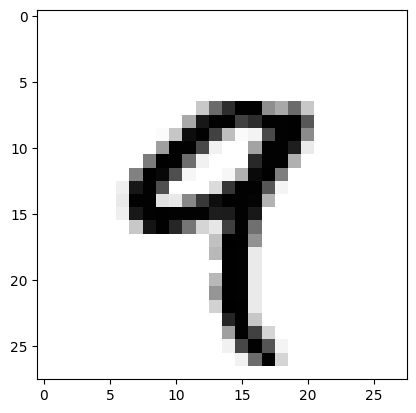

In [14]:
index = 4
print("Value of datapoint no. {}:\n{}\n".format(index,mnist.data[index,:]))
print("Target of datapoint no. {}:\n{}\n".format(index,mnist.target[index])) ## Added the target value of index 4
print("As image:\n")
plt.imshow(mnist.data[index].reshape(28,28),cmap=plt.cm.gray_r)
plt.show()

To make things a little bit simpler (and faster!), we can extract from the data binary subsets, that only contain the data for two selected digits:

The first datapoint now is: 



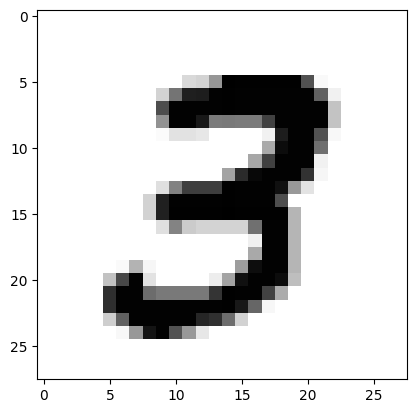

7        3
10       3
12       3
15       7
27       3
        ..
69975    3
69979    7
69986    3
69990    7
69996    3
Name: class, Length: 14434, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


In [15]:
digit0='3'
digit1='7'
mnist_bin_data=mnist.data[np.logical_or(mnist.target==digit0,mnist.target==digit1)]
mnist_bin_target=mnist.target[np.logical_or(mnist.target==digit0,mnist.target==digit1)]
print("The first datapoint now is: \n")
plt.imshow(mnist_bin_data[0].reshape(28,28),cmap=plt.cm.gray_r)
plt.show()
print(mnist_bin_target)

**Exercise 1:** Split the mnist_bin data into training and test set. Learn different SVM and NN models by varying the kernel functions (SVM), the network structure (NN), and the solver (NN). For each configuration, determine the time it takes to learn the model, and the accuracy on the test data. *Caution*: for some configurations, learning here can take a little while (several minutes).

Using the numpy where() function, one can extract the indices of the test cases that were misclassified: <br>
`misclass = np.where(test != predictions)` <br>
Inspect some misclassified cases. Do they correspond to hard to recognize digits (also for the human reader)? 

How do results (time and accuracy) change, depending on whether you consider an 'easy' binary task (e.g., distinguishing '1' and '0'), or a more difficult one (e.g., '4' vs. '5'). 

Identify one or several good configurations that give a reasonable combination of accuracy and runtime. Use these configurations to perform a full classification of the 10 classes in the original dataset (after split into train/test). Using `sklearn.metrics.confusion_matrix` you can get an overview of all combinations of true and predicted labels (see p. 298-299 in Müller & Guido). What does this tell you about which digits are easy, and which ones are difficult to recognize, and which ones are most easily confused?

In [16]:
## Exercise: Split the mnist_bin data into training and test set. 

from sklearn.model_selection import train_test_split

## Splitting the data set into a test and train. This only holds 3 and 7, as per split in previous section
X_train, X_test, y_train, y_test = train_test_split(mnist_bin_data, mnist_bin_target, random_state=1) ## test size 25% and training 75%

In [17]:
## Exercise: Learn different SVM and NN models by varying the kernel functions (SVM), the network structure (NN), and the solver (NN)
import time

## In the below section we learn a SVM model with a linaers kernel type. We measure the time it takes to learn the model (as is done in the coming sections as well) to know
## How long it takes and thence include that when evaluating the performance of the model.

kernel_type = 'linear'
start=time.time()
linear_svm = SVC(kernel=kernel_type).fit(X_train,y_train)
end=time.time()
elapsed_time=end-start 
print(f"Time it took to learn the {kernel_type} kernel model: {elapsed_time:.2f} seconds")

# Calculate accuracy on training data
train_accuracy = linear_svm.score(X_train, y_train)
print(f"Training Accuracy: {train_accuracy:.2f}")

# Calculate accuracy on test data
test_accuracy = linear_svm.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

Time it took to learn the linear kernel model: 3.43 seconds
Training Accuracy: 1.00
Test Accuracy: 0.98


The SVM linaer model is done in 11 seconds and has a test accurancy of 98% and 100% on the training set.

In [18]:
## Exercise: Learn different SVM and NN models by varying the kernel functions (SVM), the network structure (NN), and the solver (NN)
import time

## In the next section we learn a SVM model, this time with a rbf kernel type. Gamme is set to 1.0 and not altered during this exercise.


kernel_type = 'rbf'
start=time.time()
kernel_svm = SVC(kernel=kernel_type, gamma=1.0).fit(X_train,y_train)
end=time.time()
elapsed_time=end-start 
print(f"Time it took to learn the {kernel_type} kernel model: {elapsed_time:.2f} seconds")

# Calculate accuracy on training data
train_accuracy = kernel_svm.score(X_train, y_train)
print(f"Training Accuracy: {train_accuracy:.2f}")

# Calculate accuracy on test data
test_accuracy = kernel_svm.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

Time it took to learn the rbf kernel model: 146.94 seconds
Training Accuracy: 1.00
Test Accuracy: 0.51


The SVM model using the rbf kernel takes 475 seconds (approx. 8 min) and get 51% in accurancy on the test data and 100% on the training data.

Comparing the two SVM the latter performs poorly (51%) compared to the first (98%). Also the latter takes almost 8 min compared to only 10 seconds in the first model.

Next section turns to neural networks - let's see how they perform.

In [ ]:
"""
import time

kernel_type = 'precomputed'
start=time.time()
kernel_svm = SVC(kernel=kernel_type, gamma=1.0).fit(X_train,y_train)
end=time.time()
elapsed_time=end-start 
print(f"Time it took to learn the {kernel_type} kernel model: {elapsed_time:.2f} seconds")

# Calculate accuracy on training data
train_accuracy = kernel_svm.score(X_train, y_train)
print(f"Training Accuracy: {train_accuracy:.2f}")

# Calculate accuracy on test data
test_accuracy = kernel_svm.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")
"""

ValueError: Precomputed matrix must be a square matrix. Input is a 10825x784 matrix.

# Neural Networks

This next section is rather expansive, so let's run through the intention.

Neural networks can have 0 or more hidden layers. For each layer it's possible to configure the number of nodes. E.g. () denotes no hidden layers (name here), (10, 10, 10) denotes three layers each layer containing to nodes. The construction of the layers and number of nodes is it's architecture.
Furthermore it possible to set the activation to a number of variations. Here relu and tanh is used.
To find a good model the model iteraters through and tries to find a good (valley) mode. The number of iterations can be set and impacts the model ability to find a convergence point. A model can run out of iterations without being able to converge, which results in a convergence warning.
Lastely the solver can also be configured. Here it set to lbfgs and not changed.

There is a range of possible configurations and architectures, leaving a number of possible scenarios. The code below build a iterative model, that can be configured to run through different scenarios. The iterative model iterates through the defined architecture and then the activations. Firstly it tries each architecture (e.g. () then (5,), then (10,) and so on) with each activations.

The resulting output is saved in a csv file with related information about the model e.g. the architecture, the activation, the number of iterations, the solver, time to learn the model as so on. It appends the result, meaning when it runs multiple times, previous results are not overwritten.

Iterations were changed from one run to the next from 500 to 1000 and then to 5000. 

While it may seem like extensive code to try different models, this is to automate the task and make it easy to try different architectures.

One further update that could be helpful was to make a thrid iteration through different max iterations - that is for another day.

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import accuracy_score
from datetime import datetime
import time
import pandas as pd
import os
import warnings

print("Imports done and real code execution is starting at this time: ", time.strftime("%H:%M:%S", time.localtime(time.time())))

# Define architectures and activation functions to test
architectures = [
    (),                     # No hidden layers
    (5,),                  # 1 layer, 5 neurons
    (10,),                 # 1 layer, 10 neurons
    (15,),                  ## one layer 15 neurons
    (20,),
    (5, 5),               # 2 layers, 5 neurons each
    (10, 5),              # 2 layers, 10 neurons in first, 5 in second
    (5, 5, 5),
    (10, 10, 5),         # 3 layers
    (10, 10, 10),
    (15, 15, 15),
    (5, 5, 5, 5),
    (10, 10, 10, 10),9
]

activations = ['relu', 'tanh']

# Configuration parameters
solver = 'lbfgs'           # Solver type
max_iter = 5000             # Number of iterations
random_state_no = 11          # Random state for reproducibility

file_path = "mlp_results.csv"

# Store results
results = []

for activation in activations:
    for arch in architectures:
        print(f"Testing architecture: {arch} with activation: {activation}") # outputting the architecture and activation to the "terminal"
        start_model_and_train = time.time() ## Starting the timer
        print("Start time is: ", time.strftime("%H:%M:%S", time.localtime(start_model_and_train)))
        mlp = MLPClassifier(hidden_layer_sizes=arch, activation=activation, solver=solver, random_state=random_state_no, max_iter=max_iter)  ## Setting up the model

        # Train the model and capture warnings
        with warnings.catch_warnings(record=True) as w:
            warnings.simplefilter("always", ConvergenceWarning)
            mlp.fit(X_train, y_train)
            # Check for ConvergenceWarning
            convergence_warning = any(issubclass(warn.category, ConvergenceWarning) for warn in w)

        #mlp.fit(X_train, y_train)

        end_model_and_train = time.time() ## End timer logging time for training
        print("End time for model training is: ", time.strftime("%H:%M:%S", time.localtime(time.time())))
        
        ## Evaluate the model
        train_acc = mlp.score(X_train, y_train)
        test_acc = mlp.score(X_test, y_test)
        elapsed_time = end_model_and_train - start_model_and_train

        ## A bit of formatting, so time is in hh:mm:ss and not just number of seconds
        minutes, seconds = divmod(elapsed_time, 60)
        formatted_time = f"{int(minutes)}m {seconds:.2f}s"

       
        ## Save results
        results.append({
            "architecture": arch,
            "activation": activation,
            "solver": solver,
            "iterations": max_iter,
            "random_state": random_state_no,
            "train_accuracy": train_acc,
            "test_accuracy": test_acc,
            "time": elapsed_time,
            "formatted_time": formatted_time,
            "converged": "No (Did not converge)" if convergence_warning else "Yes",
            "timestamp": datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        })
        print(f"Activation: {activation}, Train Accuracy: {train_acc:.2f}, Test Accuracy: {test_acc:.2f}, Time: {time.strftime("%H:%M:%S", time.localtime(elapsed_time))} seconds\n")
        print("Before I move on time is: ", time.strftime("%H:%M:%S", time.localtime(time.time())))

# Create a DataFrame to save results
results_df = pd.DataFrame(results)

# Append results to CSV
if os.path.exists(file_path):
    # Load existing data and append new results
    existing_data = pd.read_csv(file_path)
    updated_data = pd.concat([existing_data, results_df], ignore_index=True)
    updated_data.to_csv(file_path, index=False)
else:
    # Create a new CSV file
    results_df.to_csv(file_path, index=False)

print("Results saved to", file_path)

print("The results: ",results_df)


Imports done and real code execution is starting at this time:  10:16:05
Testing architecture: () with activation: relu
Start time is:  10:16:05


End time for model training is:  10:16:35
Activation: relu, Train Accuracy: 1.00, Test Accuracy: 0.98, Time: 01:00:30 seconds

Before I move on time is:  10:16:35
Testing architecture: (5,) with activation: relu
Start time is:  10:16:35
End time for model training is:  10:23:35
Activation: relu, Train Accuracy: 1.00, Test Accuracy: 0.99, Time: 01:06:59 seconds

Before I move on time is:  10:23:35
Testing architecture: (10,) with activation: relu
Start time is:  10:23:35
End time for model training is:  10:24:06
Activation: relu, Train Accuracy: 1.00, Test Accuracy: 0.99, Time: 01:00:30 seconds

Before I move on time is:  10:24:07
Testing architecture: (15,) with activation: relu
Start time is:  10:24:07
End time for model training is:  10:25:12
Activation: relu, Train Accuracy: 1.00, Test Accuracy: 1.00, Time: 01:01:05 seconds

Before I move on time is:  10:25:13
Testing architecture: (20,) with activation: relu
Start time is:  10:25:13
End time for model training is:  10:25:46
Activat

In [11]:
import pandas as pd
import os
from datetime import datetime

# Provided results data
provided_results = [
    {"architecture": "()", "activation": "relu", "train_accuracy": 1.000000, "test_accuracy": 0.984206, "time": 97.39, "convergence_warning": False},
    {"architecture": "(5,)", "activation": "relu", "train_accuracy": 0.990947, "test_accuracy": 0.989194, "time": 327.91, "convergence_warning": True},
    {"architecture": "(10,)", "activation": "relu", "train_accuracy": 0.998522, "test_accuracy": 0.992242, "time": 87.67, "convergence_warning": False},
    {"architecture": "(5, 5)", "activation": "relu", "train_accuracy": 0.991409, "test_accuracy": 0.989748, "time": 210.90, "convergence_warning": False},
    {"architecture": "(10, 5)", "activation": "relu", "train_accuracy": 0.998707, "test_accuracy": 0.992242, "time": 214.71, "convergence_warning": False},
    {"architecture": "(10, 10, 5)", "activation": "relu", "train_accuracy": 0.999538, "test_accuracy": 0.993350, "time": 339.80, "convergence_warning": False},
    {"architecture": "()", "activation": "tanh", "train_accuracy": 1.000000, "test_accuracy": 0.984206, "time": 110.59, "convergence_warning": False},
    {"architecture": "(5,)", "activation": "tanh", "train_accuracy": 0.988453, "test_accuracy": 0.985592, "time": 412.76, "convergence_warning": True},
    {"architecture": "(10,)", "activation": "tanh", "train_accuracy": 0.993626, "test_accuracy": 0.987254, "time": 489.80, "convergence_warning": True},
    {"architecture": "(5, 5)", "activation": "tanh", "train_accuracy": 0.987898, "test_accuracy": 0.987254, "time": 707.54, "convergence_warning": True},
    {"architecture": "(10, 5)", "activation": "tanh", "train_accuracy": 0.992702, "test_accuracy": 0.990025, "time": 655.37, "convergence_warning": True},
    {"architecture": "(10, 10, 5)", "activation": "tanh", "train_accuracy": 0.992517, "test_accuracy": 0.988640, "time": 940.86, "convergence_warning": True},
]

# File path for the results
file_path = "mlp_results_updated.csv"

# Enhance results with additional information
for result in provided_results:
    # Add timestamp
    result["timestamp"] = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    
    # Determine convergence status
    result["converged"] = "No (Did not converge)" if result["convergence_warning"] else "Yes"
    
    # Convert time to minutes and seconds
    minutes, seconds = divmod(result["time"], 60)
    result["formatted_time"] = f"{int(minutes)}m {seconds:.2f}s"

# Convert the results into a DataFrame
results_df = pd.DataFrame(provided_results)

# Save or append the results to a CSV file
if os.path.exists(file_path):
    # Append new data to the existing file
    existing_data = pd.read_csv(file_path)
    updated_data = pd.concat([existing_data, results_df], ignore_index=True)
    updated_data.to_csv(file_path, index=False)
else:
    # Create a new file if it doesn't exist
    results_df.to_csv(file_path, index=False)

print(f"Provided results saved to {file_path}")


Provided results saved to mlp_results_updated.csv


In [ ]:
## Exercise: Using the numpy where() function, one can extract the indices of the test cases that were misclassified: <br> `misclass = np.where(test != predictions)` <br>

## This piece of code makes a prediction based on the model define in the last section. Basically mlp is the last model defined (4 layered NN model with 10 nodes in each, using activation tanh) and used in the previous section

import numpy as np

# Generate predictions
predictions = mlp.predict(X_test)

# Find misclassified indices
misclass_indices = np.where(y_test != predictions)[0]

print("Indices of misclassified samples:", misclass_indices)


Indices of misclassified samples: [  36   72  110  271  276  304  392  454  641  716 1029 1055 1097 1117
 1637 1686 1694 1723 1729 1930 2243 2298 2305 2393 2428 2482 2551 2609
 2677 2883 2933 2981 3084 3250 3271 3309 3492 3514 3536]


The list generated above is an array of the cases where the prediction differed from the actual result. Each number represent and index.

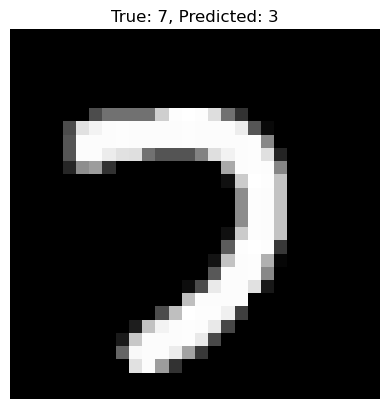

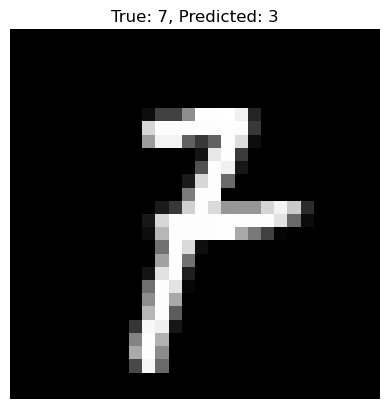

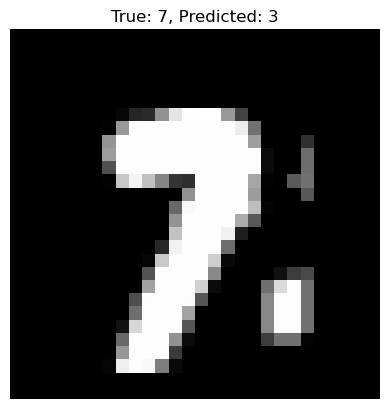

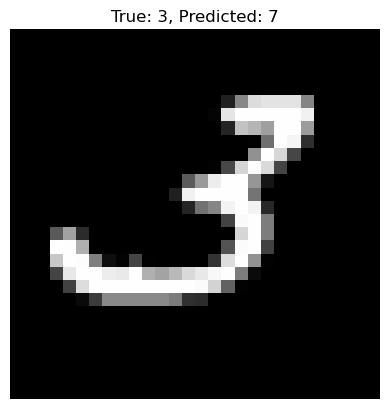

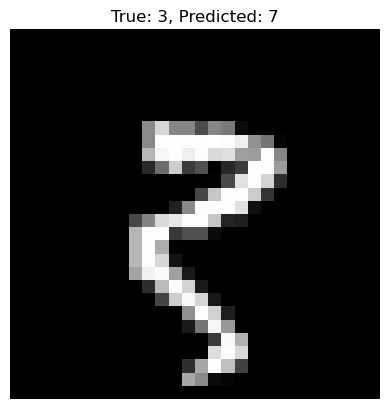

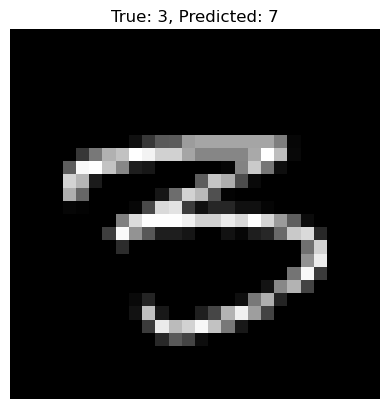

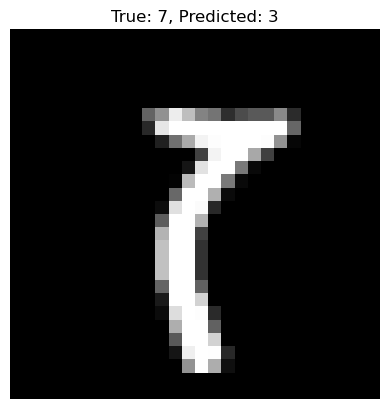

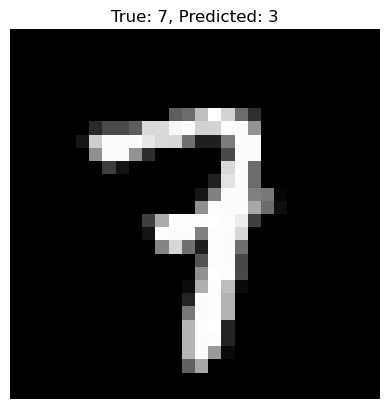

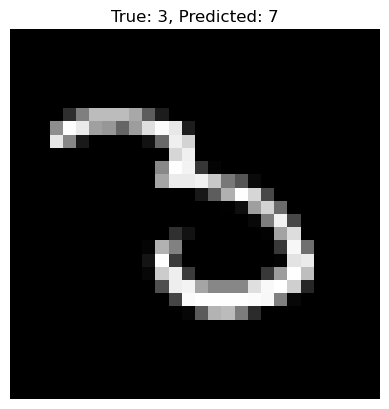

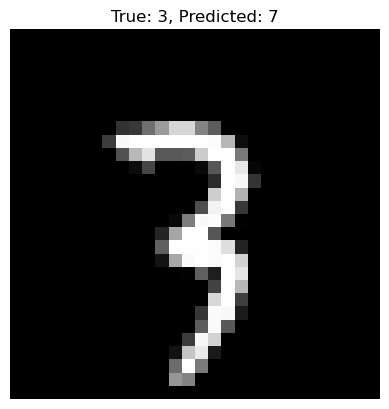

In [ ]:
## Exercise: Inspect some misclassified cases. Do they correspond to hard to recognize digits (also for the human reader)? 
import matplotlib.pyplot as plt

## This code iterates over a number of cases where the prediction did not match the result and visualizes the cases ini order for the (human) reader can get an impression of if they were indeed difficult cases to discern

# Iterate over the first 10 misclassified samples
for idx in misclass_indices[:10]:  # Limit visualization to the first 10
    # Reshape and display the image
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    
    # Use .iloc to access the true label by positional index
    true_label = y_test.iloc[idx] if isinstance(y_test, pd.Series) else y_test[idx]
    predicted_label = predictions[idx]
    
    plt.title(f"True: {true_label}, Predicted: {predicted_label}")
    plt.axis('off')  # Turn off axis labels for clarity
    plt.show()


The first datapoint now is: 



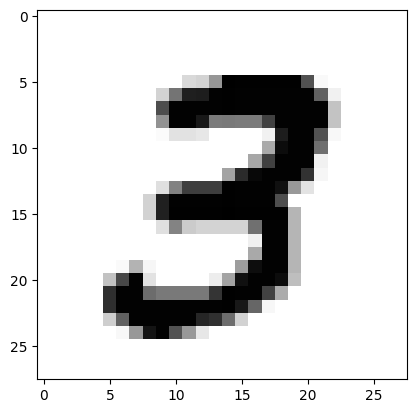

['3' '3' '3' ... '3' '7' '3']
Time it took to learn the linear kernel model: 3.32 seconds
Training Accuracy: 1.00
Test Accuracy: 0.98
Testing architecture: () with activation: relu
Start time is:  10:50:09
End time for model training is:  10:50:11
Before I move on time is:  10:50:11
Testing architecture: (5,) with activation: relu
Start time is:  10:50:11
End time for model training is:  10:50:27
Before I move on time is:  10:50:27
Testing architecture: (10,) with activation: relu
Start time is:  10:50:27
End time for model training is:  10:50:31
Before I move on time is:  10:50:31
Testing architecture: (15,) with activation: relu
Start time is:  10:50:31
End time for model training is:  10:50:36
Before I move on time is:  10:50:36
Testing architecture: (20,) with activation: relu
Start time is:  10:50:36
End time for model training is:  10:50:39
Before I move on time is:  10:50:39
Testing architecture: (5, 5) with activation: relu
Start time is:  10:50:39
End time for model training i

In [30]:
## Question: How do results (time and accuracy) change, depending on whether you consider an 'easy' binary task 
# (e.g., distinguishing '1' and '0'), or a more difficult one (e.g., '4' vs. '5'). 

digit0='3'
digit1='7'
mnist_bin_data=mnist.data[np.logical_or(mnist.target==digit0,mnist.target==digit1)]
mnist_bin_target=mnist.target[np.logical_or(mnist.target==digit0,mnist.target==digit1)]
print("The first datapoint now is: \n")
plt.imshow(mnist_bin_data[0].reshape(28,28),cmap=plt.cm.gray_r)
plt.show()
print(mnist_bin_target)

## Split the mnist_bin data into training and test set. 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(mnist_bin_data, mnist_bin_target, random_state=1) # test size 25% and training 75%

kernel_type = 'linear'
start=time.time()
linear_svm = SVC(kernel=kernel_type).fit(X_train,y_train)
end=time.time()
elapsed_time=end-start 
print(f"Time it took to learn the {kernel_type} kernel model: {elapsed_time:.2f} seconds")

# Calculate accuracy on training data
train_accuracy = linear_svm.score(X_train, y_train)
print(f"Training Accuracy: {train_accuracy:.2f}")

# Calculate accuracy on test data
test_accuracy = linear_svm.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

from sklearn.neural_network import MLPClassifier
from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import accuracy_score
from datetime import datetime
import time
import pandas as pd
import os
import warnings

#print("Imports done and real code execution is starting at this time: ", time.strftime("%H:%M:%S", time.localtime(time.time())))

# Define architectures and activation functions to test
architectures = [
    (),                     # No hidden layers
    (5,),                  # 1 layer, 5 neurons
    (10,),                 # 1 layer, 10 neurons
    (15,),                  ## one layer 15 neurons
    (20,),
    (5, 5),               # 2 layers, 5 neurons each
    (10, 5),              # 2 layers, 10 neurons in first, 5 in second
    (5, 5, 5),
    (10, 10, 5),         # 3 layers
    (10, 10, 10),
    (15, 15, 15),
    (5, 5, 5, 5),
    (10, 10, 10, 10),
]

activations = ['relu', 'tanh']

# Configuration parameters
solver = 'lbfgs'           # Solver type
max_iter = 5000             # Number of iterations
random_state_no = 11          # Random state for reproducibility

file_path = "mlp_results.csv"

# Store results
results = []

for activation in activations:
    for arch in architectures:
        print(f"Testing architecture: {arch} with activation: {activation}")
        start_model_and_train = time.time()
        print("Start time is: ", time.strftime("%H:%M:%S", time.localtime(start_model_and_train)))
        mlp = MLPClassifier(hidden_layer_sizes=arch, activation=activation, solver=solver, random_state=random_state_no, max_iter=max_iter)            # Number of iterations

        # Train the model and capture warnings
        with warnings.catch_warnings(record=True) as w:
            warnings.simplefilter("always", ConvergenceWarning)
            mlp.fit(X_train, y_train)
            # Check for ConvergenceWarning
            convergence_warning = any(issubclass(warn.category, ConvergenceWarning) for warn in w)

        #mlp.fit(X_train, y_train)

        end_model_and_train = time.time()
        print("End time for model training is: ", time.strftime("%H:%M:%S", time.localtime(time.time())))
        
        # Evaluate
        train_acc = mlp.score(X_train, y_train)
        test_acc = mlp.score(X_test, y_test)
        elapsed_time = end_model_and_train - start_model_and_train

        minutes, seconds = divmod(elapsed_time, 60)
        formatted_time = f"{int(minutes)}m {seconds:.2f}s"

       
        # Save results
        results.append({
            "architecture": arch,
            "activation": activation,
            "solver": solver,
            "iterations": max_iter,
            "random_state": random_state_no,
            "train_accuracy": train_acc,
            "test_accuracy": test_acc,
            "time": elapsed_time,
            "formatted_time": formatted_time,
            "converged": "No (Did not converge)" if convergence_warning else "Yes",
            "timestamp": datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        })
        #print(f"Activation: {activation}, Train Accuracy: {train_acc:.2f}, Test Accuracy: {test_acc:.2f}, Time: {time.strftime("%H:%M:%S", time.localtime(elapsed_time))} seconds\n")
        print("Before I move on time is: ", time.strftime("%H:%M:%S", time.localtime(time.time())))

# Create a DataFrame to save results
results_df = pd.DataFrame(results)

# Append results to CSV
if os.path.exists(file_path):
    # Load existing data and append new results
    existing_data = pd.read_csv(file_path)
    updated_data = pd.concat([existing_data, results_df], ignore_index=True)
    updated_data.to_csv(file_path, index=False)
else:
    # Create a new CSV file
    results_df.to_csv(file_path, index=False)

print("Results saved to", file_path)

print("The results: ",results_df)

In [23]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import time
import os
from datetime import datetime

## Question: How do results (time and accuracy) change, depending on whether you consider an 'easy' binary task 
# (e.g., distinguishing '1' and '0'), or a more difficult one (e.g., '4' vs. '5'). 

## This next code does a couple of things, let's run through the idea
## In the previous section a number of models were identified that had a good performance, in that accurancy on the test set was very good and the time to learn the model was also better than its peers. These 
#  were based on comparing 3 and 7
## The purpose of this section is to try a number of pairs to see if performance for the models that performed well on 3 and 7 is also good on these pairs. 

## Specifically the pairs 3 and 7, 4 and 5, as well as 0 and 1 are tried. The architecture is configured in the beginning, using the same resolver and with a preset number of max iterations. During the experiment I did change
#  the number of iterations.
## The results along the configuration is saved in a csv file.

# Define digit pairs, neural network configurations, and result storage
digit_pairs = [(7, 3), (4, 5), (0, 1)]  ## The pairs that are tried
## Setting up the configuration for the architecture
nn_configurations = [
    {"architecture": (), "solver": "lbfgs", "iterations": 5000},
    {"architecture": (10,), "solver": "lbfgs", "iterations": 5000},
    {"architecture": (20), "solver": "lbfgs", "iterations": 5000},
    {"architecture": (15,15,15), "solver": "lbfgs", "iterations": 5000},
]
## Array to save the results
results = []

## Name of file to be saved
file_path = "pair_runs.csv"

# Loop through each pair of digits
for digit1, digit2 in digit_pairs:
    print(f"Processing pair: {digit1} and {digit2}")

    # Filter dataset for the current pair
    indices = np.logical_or(mnist.target == str(digit1), mnist.target == str(digit2))
    X_pair = mnist.data[indices]
    y_pair = mnist.target[indices]
    y_pair = np.where(y_pair == str(digit1), digit1, digit2)

    ## Splitting the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_pair, y_pair, random_state=11)

    # Train SVC model
    print(f"Training SVC for pair {digit1}-{digit2}")
    start_svc = time.time()
    svc = SVC(kernel="linear", random_state=11)
    svc.fit(X_train, y_train)
    end_svc = time.time()

    # Evaluate SVC model
    svc_train_acc = svc.score(X_train, y_train)
    svc_test_acc = svc.score(X_test, y_test)
    svc_time = end_svc - start_svc

    # Save SVC model
    svc_model_name = f"svc_{digit1}{digit2}"
    #models[svc_model_name] = svc

    # Save SVC results
    results.append({
        "pair": f"{digit1}-{digit2}",
        "model": svc_model_name,
        "train_accuracy": svc_train_acc,
        "test_accuracy": svc_test_acc,
        "time": svc_time,
        "timestamp": datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
    })

    # Train NN models for the current pair
    for config in nn_configurations:
        arch = config["architecture"]
        solver = config["solver"]
        iterations = config["iterations"]

        print(f"Training NN for pair {digit1}-{digit2} with architecture {arch}, solver {solver}, iterations {iterations}")
        start_nn = time.time()
        nn = MLPClassifier(hidden_layer_sizes=arch, solver=solver, max_iter=iterations, random_state=11)
        
        ## Try catch to cater for convergence warning
        try:
            nn.fit(X_train, y_train)
            converged = "Yes"
        except Exception as e:
            converged = "No"

        end_nn = time.time()

        # Evaluate NN model
        nn_train_acc = nn.score(X_train, y_train) if converged == "Yes" else "N/A"
        nn_test_acc = nn.score(X_test, y_test) if converged == "Yes" else "N/A"
        nn_time = end_nn - start_nn

        # Save NN model
        #nn_model_name = f"nn_{digit1}{digit2}_{'-'.join(map(str, arch)) if arch else 'none'}"
        #models[nn_model_name] = nn

        # Save NN results
        results.append({
            "pair": f"{digit1}-{digit2}",
            #"model": nn_model_name,
            "architecture": arch,
            "solver": solver,
            "iterations": iterations,
            "train_accuracy": nn_train_acc,
            "test_accuracy": nn_test_acc,
            "time": nn_time,
            "converged": converged,
            "timestamp": datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
        })

# Save results to CSV
results_df = pd.DataFrame(results)

## If the file already exists then append data or else create the file
if os.path.exists(file_path):
    # Append new data to the existing file
    existing_data = pd.read_csv(file_path)
    updated_data = pd.concat([existing_data, results_df], ignore_index=True)
    updated_data.to_csv(file_path, index=False)
else:
    # Create a new CSV file
    results_df.to_csv(file_path, index=False)

print(f"Results saved to {file_path}")


Processing pair: 7 and 3
Training SVC for pair 7-3
Training NN for pair 7-3 with architecture (), solver lbfgs, iterations 5000
Training NN for pair 7-3 with architecture (10,), solver lbfgs, iterations 5000
Training NN for pair 7-3 with architecture 20, solver lbfgs, iterations 5000
Training NN for pair 7-3 with architecture (15, 15, 15), solver lbfgs, iterations 5000
Processing pair: 4 and 5
Training SVC for pair 4-5
Training NN for pair 4-5 with architecture (), solver lbfgs, iterations 5000
Training NN for pair 4-5 with architecture (10,), solver lbfgs, iterations 5000
Training NN for pair 4-5 with architecture 20, solver lbfgs, iterations 5000
Training NN for pair 4-5 with architecture (15, 15, 15), solver lbfgs, iterations 5000
Processing pair: 0 and 1
Training SVC for pair 0-1
Training NN for pair 0-1 with architecture (), solver lbfgs, iterations 5000
Training NN for pair 0-1 with architecture (10,), solver lbfgs, iterations 5000
Training NN for pair 0-1 with architecture 20, s

In [ ]:
## Exercise: Identify one or several good configurations that give a reasonable combination of accuracy and runtime. Use these configurations to perform a full 
# classification of the 10 classes in the original dataset (after split into train/test).

import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
import time
import os

# Load MNIST dataset
mnist = fetch_openml(name="mnist_784", version=1, as_frame=False)
X = mnist.data
y = mnist.target.astype(int)  # Ensure labels are integers

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

# Results storage
results = []

# File path for saving results
file_path = "full_dataset_runs.csv"

def format_time(seconds):
    # Convert time in seconds to hh:mm:ss format.
    hours, remainder = divmod(seconds, 3600)
    minutes, seconds = divmod(remainder, 60)
    return f"{int(hours):02}:{int(minutes):02}:{seconds:05.2f}"

### Train SVC on full dataset ###
print("Training SVC on full dataset")
start_svc = time.time()
svc = SVC(kernel="linear", random_state=11)
svc.fit(X_train, y_train)
end_svc = time.time()

# Evaluate SVC
svc_train_acc = svc.score(X_train, y_train)
svc_test_acc = svc.score(X_test, y_test)
svc_time = end_svc - start_svc

# Save SVC results
results.append({
    "model": "svc_full",
    "train_accuracy": svc_train_acc,
    "test_accuracy": svc_test_acc,
    "time": format_time(svc_time),
    "timestamp": time.strftime("%Y-%m-%d %H:%M:%S")
})

### Train NN on full dataset ###
print("Training NN on full dataset with 1 layer (20 nodes)")
start_nn = time.time()
nn = MLPClassifier(hidden_layer_sizes=(20,), solver="lbfgs", max_iter=500, random_state=11)

try:
    nn.fit(X_train, y_train)
    converged = "Yes"
except Exception as e:
    converged = "No"
end_nn = time.time()

# Evaluate NN
nn_train_acc = nn.score(X_train, y_train) if converged == "Yes" else "N/A"
nn_test_acc = nn.score(X_test, y_test) if converged == "Yes" else "N/A"
nn_time = end_nn - start_nn

# Save NN results
results.append({
    "model": "nn_full_20",
    "architecture": (20,),
    "solver": "lbfgs",
    "iterations": 500,
    "train_accuracy": nn_train_acc,
    "test_accuracy": nn_test_acc,
    "time": format_time(nn_time),
    "converged": converged,
    "timestamp": time.strftime("%Y-%m-%d %H:%M:%S")
})

# Save results to CSV
results_df = pd.DataFrame(results)

if os.path.exists(file_path):
    # Append new data to the existing file
    existing_data = pd.read_csv(file_path)
    updated_data = pd.concat([existing_data, results_df], ignore_index=True)
    updated_data.to_csv(file_path, index=False)
else:
    # Create a new CSV file
    results_df.to_csv(file_path, index=False)

print(f"Results saved to {file_path}")


Training SVC on full dataset


The code below loads the data and makes a train and a test data set

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
    
mnist = fetch_openml(name="mnist_784", version=1, as_frame=False)
print("data fetched")
X = mnist.data
y = mnist.target.astype(int)  # Ensure labels are integers
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)

data fetched


Below code iterates through a number of architectures with the full data set and a set of max iterations

In [20]:
import pandas as pd
import time
from sklearn.neural_network import MLPClassifier
import os
from datetime import datetime

# File path for saving results
file_path = "full_dataset_results.csv"

# Function to format timestamps (start and end)
def format_timestamp(seconds=None):
    """Format epoch time to YYYY-MM-DD HH:MM:SS."""
    if seconds is None:
        seconds = time.time()
    return datetime.fromtimestamp(seconds).strftime("%Y-%m-%d %H:%M:%S")

# Function to format durations in hh:mm:ss
def format_duration(seconds):
    """Convert duration in seconds to hh:mm:ss format."""
    hours, remainder = divmod(int(seconds), 3600)
    minutes, seconds = divmod(remainder, 60)
    return f"{hours:02}:{minutes:02}:{seconds:02}"

# Function to append results to the CSV file
def append_result_to_csv(result, file_path):
    """Append a single result row to the CSV file."""
    result_df = pd.DataFrame([result])
    if not os.path.exists(file_path):
        result_df.to_csv(file_path, index=False)
    else:
        existing_df = pd.read_csv(file_path)
        updated_df = pd.concat([existing_df, result_df], ignore_index=True)
        updated_df.to_csv(file_path, index=False)

# Training and evaluation function
def train_and_evaluate_nn(layers_list, solver, iterations_list, X_train, X_test, y_train, y_test):
    """Train and evaluate a neural network."""
    for layers in layers_list:
        for max_iter in iterations_list:
            try:
                # Log start time
                start_train = time.time()
                start_timestamp = format_timestamp(start_train)
                print(f"Training started at {start_timestamp} with layers={layers}, solver={solver}, max_iter={max_iter}")

                # Initialize NN model
                nn = MLPClassifier(hidden_layer_sizes=layers, solver=solver, max_iter=max_iter, random_state=11)

                # Train model
                try:
                    nn.fit(X_train, y_train)
                    if nn.n_iter_ >= max_iter:
                        converged = "No (Reached max_iter)"
                    else:
                        converged = "Yes"
                except Exception as train_error:
                    converged = f"No (Error: {train_error})"
                    print(f"Training failed: {train_error}")
                    train_acc = "N/A"
                    test_acc = "N/A"
                else:
                    train_acc = nn.score(X_train, y_train) * 100
                    test_acc = nn.score(X_test, y_test) * 100

                end_train = time.time()
                end_timestamp = format_timestamp(end_train)
                training_duration = format_duration(end_train - start_train)
                print(f"Training completed at {end_timestamp}")

                # Evaluate model
                start_eval = time.time()
                print(f"Evaluation started at {format_timestamp(start_eval)}")
                if converged.startswith("Yes"):
                    evaluation_duration = "00:00:00"  # lbfgs solver evaluates implicitly during training
                else:
                    evaluation_duration = format_duration(time.time() - start_eval)

                print(f"Evaluation completed at {format_timestamp(time.time())}")

                # Record results
                result = {
                    "layers": layers,
                    "solver": solver,
                    "max_iter": max_iter,
                    "train_accuracy (%)": f"{train_acc:.4f}" if train_acc != "N/A" else "N/A",
                    "test_accuracy (%)": f"{test_acc:.4f}" if test_acc != "N/A" else "N/A",
                    "training_time": training_duration,
                    "evaluation_time": evaluation_duration,
                    "converged": converged,
                    "start_time": start_timestamp,
                    "end_time": end_timestamp
                }

                # Print the result of the current iteration
                print(f"Iteration Result: {result}")

                # Append the result to the CSV
                append_result_to_csv(result, file_path)

            except Exception as error:
                print(f"An error occurred during training with layers={layers} and max_iter={max_iter}: {error}")
                continue  # Move on to the next iteration

# Example Usage
# Assume X_train, X_test, y_train, y_test are already loaded and split elsewhere
# Define parameters
layers_list = [
    (),  # No hidden layers
    (5,),  # 1 layer, 5 neurons
    (15,),  # 1 layer, 15 neurons
    (5, 5),  # 2 layers, 5 neurons each
    (10, 5),  # 2 layers, 10 neurons in first, 5 in second
    (15, 15),  # 2 layers, 15 neurons each
    (5, 5, 5),  # 3 layers, 5 neurons each
    # (10,),  # 1 layer, 10 neurons (Commented out)
    # (20,),  # 1 layer, 20 neurons (Commented out)
    # (10, 10, 5),  # 3 layers, 10 neurons each in the first two layers, 5 in the third
    # (10, 10, 10),  # 3 layers, 10 neurons each
    (15, 15, 15),  # 3 layers, 15 neurons each
    # (5, 5, 5, 5),  # 4 layers, 5 neurons each (Commented out)
    (10, 10, 10, 10),  # 4 layers, 10 neurons each
]
iterations_list = [500, 2000, 5000]
solver = "lbfgs"

# Call the function
train_and_evaluate_nn(
    layers_list=layers_list,
    solver=solver,
    iterations_list=iterations_list,
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test
)


Training started at 2024-12-06 09:40:06 with layers=(), solver=lbfgs, max_iter=500


c:\Users\KennethElong(KEEL)\IdeaProjects\firstPythonProject\firstPyhtonProject\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Training completed at 2024-12-06 09:41:13
Evaluation started at 2024-12-06 09:41:13
Evaluation completed at 2024-12-06 09:41:13
Iteration Result: {'layers': (), 'solver': 'lbfgs', 'max_iter': 500, 'train_accuracy (%)': '92.9107', 'test_accuracy (%)': '89.8786', 'training_time': '00:01:07', 'evaluation_time': '00:00:00', 'converged': 'No (Reached max_iter)', 'start_time': '2024-12-06 09:40:06', 'end_time': '2024-12-06 09:41:13'}
Training started at 2024-12-06 09:41:13 with layers=(), solver=lbfgs, max_iter=2000


c:\Users\KennethElong(KEEL)\IdeaProjects\firstPythonProject\firstPyhtonProject\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Training completed at 2024-12-06 09:45:37
Evaluation started at 2024-12-06 09:45:37
Evaluation completed at 2024-12-06 09:45:37
Iteration Result: {'layers': (), 'solver': 'lbfgs', 'max_iter': 2000, 'train_accuracy (%)': '94.3268', 'test_accuracy (%)': '91.4071', 'training_time': '00:04:23', 'evaluation_time': '00:00:00', 'converged': 'No (Reached max_iter)', 'start_time': '2024-12-06 09:41:13', 'end_time': '2024-12-06 09:45:37'}
Training started at 2024-12-06 09:45:37 with layers=(), solver=lbfgs, max_iter=5000


c:\Users\KennethElong(KEEL)\IdeaProjects\firstPythonProject\firstPyhtonProject\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Training completed at 2024-12-06 09:56:09
Evaluation started at 2024-12-06 09:56:09
Evaluation completed at 2024-12-06 09:56:09
Iteration Result: {'layers': (), 'solver': 'lbfgs', 'max_iter': 5000, 'train_accuracy (%)': '94.5232', 'test_accuracy (%)': '91.4857', 'training_time': '00:10:31', 'evaluation_time': '00:00:00', 'converged': 'No (Reached max_iter)', 'start_time': '2024-12-06 09:45:37', 'end_time': '2024-12-06 09:56:09'}
Training started at 2024-12-06 09:56:09 with layers=(5,), solver=lbfgs, max_iter=500
Training completed at 2024-12-06 09:56:11
Evaluation started at 2024-12-06 09:56:11
Evaluation completed at 2024-12-06 09:56:11
Iteration Result: {'layers': (5,), 'solver': 'lbfgs', 'max_iter': 500, 'train_accuracy (%)': '11.2089', 'test_accuracy (%)': '11.4286', 'training_time': '00:00:02', 'evaluation_time': '00:00:00', 'converged': 'Yes', 'start_time': '2024-12-06 09:56:09', 'end_time': '2024-12-06 09:56:11'}
Training started at 2024-12-06 09:56:11 with layers=(5,), solver=l

c:\Users\KennethElong(KEEL)\IdeaProjects\firstPythonProject\firstPyhtonProject\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Training completed at 2024-12-06 09:57:44
Evaluation started at 2024-12-06 09:57:44
Evaluation completed at 2024-12-06 09:57:44
Iteration Result: {'layers': (15,), 'solver': 'lbfgs', 'max_iter': 500, 'train_accuracy (%)': '51.4643', 'test_accuracy (%)': '51.4357', 'training_time': '00:01:28', 'evaluation_time': '00:00:00', 'converged': 'No (Reached max_iter)', 'start_time': '2024-12-06 09:56:15', 'end_time': '2024-12-06 09:57:44'}
Training started at 2024-12-06 09:57:44 with layers=(15,), solver=lbfgs, max_iter=2000


KeyboardInterrupt: 

The code below build a NN model with 4 layers, 10 nodes and 5000 in max iterations and makes a confusion matrix

In [ ]:
## Exercise: Using `sklearn.metrics.confusion_matrix` you can get an overview of all combinations of true and predicted labels (
# see p. 298-299 in Müller & Guido). What does this tell you about which digits are easy, and which ones are difficult to recognize, and which ones are most easily confused?

## Building a NN with 4 layers and 10 nodes, using relu and lbfgs and 5000 iterations

import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define the configuration
layers = (10, 10, 10, 10)
activation = "relu"
solver = "lbfgs"
max_iter = 5000

def build_and_evaluate_nn(X_train, X_test, y_train, y_test):

    # Initialize the model
    model = MLPClassifier(
        hidden_layer_sizes=layers,
        activation=activation,
        solver=solver,
        max_iter=max_iter,
        random_state=42
    )

    # Train the model
    print(f"Training the model with layers={layers}, activation={activation}, solver={solver}, max_iter={max_iter}")
    try:
        model.fit(X_train, y_train)
        print("Training completed successfully.")
    except Exception as e:
        print(f"An error occurred during training: {e}")
        return

    # Generate predictions
    y_pred = model.predict(X_test)

    # Generate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

    # Display the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix for Model Configuration: {layers}, {activation}, {solver}, {max_iter}")
    plt.show()

# Example usage:
# Assume X_train, X_test, y_train, and y_test are already defined.
# Uncomment the line below to run the function with your dataset:
# build_and_evaluate_nn(X_train, X_test, y_train, y_test)


In [19]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Load MNIST dataset
mnist = fetch_openml(name="mnist_784", version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype("int")

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model configuration
model = MLPClassifier(
    hidden_layer_sizes=(128, 64),
    activation="relu",
    solver="adam",
    max_iter=100,
    batch_size=128,
    alpha=0.0001,
    random_state=42,
    verbose=True  # Enable verbose to monitor convergence
)

# Train the model
print("Training the model...")
model.fit(X_train_scaled, y_train)
print("Training completed.")

# Evaluate the model
y_pred = model.predict(X_test_scaled)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)


Training the model...
Iteration 1, loss = 0.29130293
Iteration 2, loss = 0.10562392
Iteration 3, loss = 0.06646595
Iteration 4, loss = 0.04825473
Iteration 5, loss = 0.03408653
Iteration 6, loss = 0.02480841
Iteration 7, loss = 0.01772750
Iteration 8, loss = 0.01742728
Iteration 9, loss = 0.01654215
Iteration 10, loss = 0.01820463
Iteration 11, loss = 0.01834300
Iteration 12, loss = 0.00950696
Iteration 13, loss = 0.00726776
Iteration 14, loss = 0.01606887
Iteration 15, loss = 0.01653703
Iteration 16, loss = 0.00860087
Iteration 17, loss = 0.01265896
Iteration 18, loss = 0.00535333
Iteration 19, loss = 0.00692815
Iteration 20, loss = 0.01181867
Iteration 21, loss = 0.00791213
Iteration 22, loss = 0.00428055
Iteration 23, loss = 0.00395473
Iteration 24, loss = 0.01056394
Iteration 25, loss = 0.01230655
Iteration 26, loss = 0.00623483
Iteration 27, loss = 0.01067754
Iteration 28, loss = 0.00811398
Iteration 29, loss = 0.01218561
Iteration 30, loss = 0.00778644
Iteration 31, loss = 0.0029

## -----------------##

We next investigate the capability of the different learning approaches to find a good model, when we know that a very accurate model exists. For this, we add a 'cheat column' to our data: we add an additional column to the data matrix that simply contains a 0/1 encoding of the actual class label: 

In [ ]:
cheatcol=np.array(mnist_bin_target) #making a copy of the original target array
cheatcol[cheatcol==digit0]=0  #re-coding the two classes as 0s and 1s
cheatcol[cheatcol==digit1]=1

# The type of the target array is originally 'object' (the values '0','1',...,'9' are seen as categorical labels,
# not as numbers). We now want to use the 0's and 1's as numbers: 
cheatcol=cheatcol.astype(float)

cheatcol=np.reshape(cheatcol,[mnist_bin_data.shape[0],1]) #getting the dimensions right for the following .hstack operation to work ... 
mnist_bin_data_cheat = np.hstack((mnist_bin_data,cheatcol)) #appending the new column

All our candidate model types now are able, in principle, to construct a 100% accurate classifier for this data: we only have to 'learn' that only the last column in the data matters, and we can predict 'digit0' if we find a 0 in the last column and 'digit1' if we find a 1. All our SVM or NN network models would in principle be able to do just this, through a suitable setting of the SVM coefficients, respectively the NN weights.

**Exercise 2:** 

**a** Describe, briefly, how the coefficients and weights of an SVM and NN model (with a suitably chosen number of layers) would have to be set, so that the resulting model is 100% accurate on this cheating data. Only consider the accuracy of the SVM or NN classifier defined by the coefficients/weights. You need not take into account that the SVM satisfies the max-margin objective, or that the NN minimizes its error function. This part of the exercise does not involve any Python code. Just give your answer in a short text.

**b** Investigate how the accuracy of different SVM and NN classifiers improves in practice on this new dataset. Do you achieve 100% accuracy on the test set? If not, try to change the encoding in the cheat column: instead of representing digit1 with a 1, use a larger number, e.g. 250. Does that help? Why? This part of the exercise is in Python!

**Exercise 3:** (Now back to the data without a cheating column!) Suppose you want to design a custom kernel function for the MNIST data that better captures the relevant properties of 'similarity' in this data than the generic 'rbf' or 'poly' kernels. Bear in mind that the data as seen by our classifiers and kernel functions just consists of arrays of length 784. 

Describe one or two ideas for defining such a kernel. You need not show that the kernel you propose actually is positive semi-definite (though as a bonus, you can try to provide some arguments for that). This is a text-only exercise -- no sklearn code required!

If you are really curious, you can implement your kernel as a function, and use it as a custom kernel. See http://scikit-learn.org/stable/auto_examples/svm/plot_custom_kernel.html#sphx-glr-auto-examples-svm-plot-custom-kernel-py for an example of how that is done.